In [15]:
import perfplot
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

plt.style.use('seaborn')

In [2]:
from time import  time
import numpy as np
import perfplot
from heap import sqrt_sort_heap
from quadratico import sqrt_sort_quadratico
from common import progress_bar

sizes = [10**4, 10**5, 10**6, 10**7]
repeticoes = 30  # Quantas vezes ele vai testar cada tamanho


res_quadratico = []
res_heap = []
metodos = [sqrt_sort_quadratico, sqrt_sort_heap]


for i, metodo in enumerate(metodos):

    print("Pelo Método Quadratico" if i == 0 else "Usando Heap")
    for size in sizes:
        tempos = []
        for _ in progress_bar(repeticoes, size):
            start = time()

            np.random.seed(124)  
            array = np.random.randint(1000, size=size)

            metodo(array)

            end = time()
            tempos.append(end - start)

        media = round(np.mean(tempos), 3)
        if i == 0:
            res_quadratico.append(media)
        else:
            res_heap.append(media)



Pelo Método Quadratico


  Para n = 10^4:   0% |          | 0/30 [?s/ ordenação]  

  Para n = 10^5:   0% |          | 0/30 [?s/ ordenação]  

  Para n = 10^6:   0% |          | 0/30 [?s/ ordenação]  

  Para n = 10^7:   0% |          | 0/30 [?s/ ordenação]  

Usando Heap


  Para n = 10^4:   0% |          | 0/30 [?s/ ordenação]  

  Para n = 10^5:   0% |          | 0/30 [?s/ ordenação]  

  Para n = 10^6:   0% |          | 0/30 [?s/ ordenação]  

  Para n = 10^7:   0% |          | 0/30 [?s/ ordenação]  

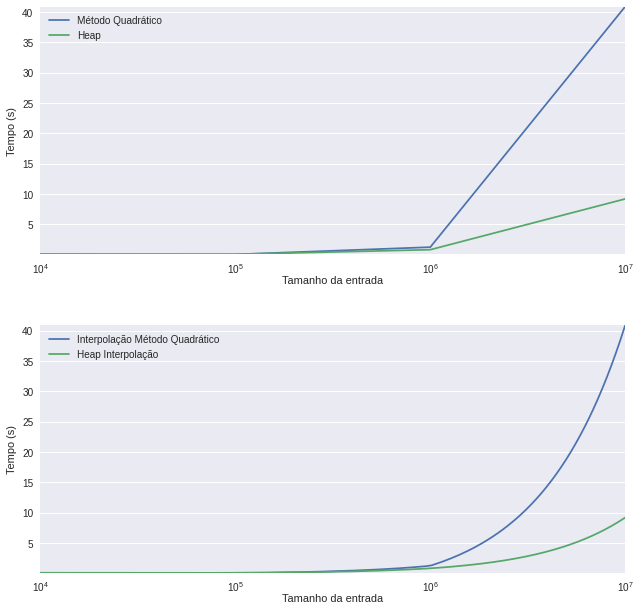

In [148]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 9), tight_layout=True)

ax1.plot(sizes, res_quadratico, label="Método Quadrático")

ax1.plot(sizes, res_heap, label="Heap")

ax1.legend()
ax1.set_ylabel("Tempo (s)", labelpad=5)
ax1.set_xlabel("Tamanho da entrada", labelpad=0)
ax1.set_xscale("log")

x = np.linspace(sizes[0], sizes[-1], 150)
y = np.interp(x, sizes, res_quadratico)
ax2.plot(x, y, label="Interpolação Método Quadrático ")

x = np.linspace(sizes[0], sizes[-1], 150)
y = np.interp(x, sizes, res_heap)

ax2.plot(x, y, label="Heap Interpolação")
ax2.legend()
ax2.set_ylabel("Tempo (s)", labelpad=5)
ax2.set_xlabel("Tamanho da entrada", labelpad=0)
ax2.set_xscale("log")

fig.subplots_adjust(bottom=0.85)


plt.show()
